# Naive Bayes Classifier

# Objective:
To filter mobile phone spam using the Naive Bayes algorithm

# Dataset: sms_spam.csv
https://github.com/stedy/Machine-Learning-with-R-datasets

# 1. Load necessary libraries

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import string
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
import statsmodels.api as sm

# 2. Load data

In [3]:
#To develop the Naive Bayes classifer, we will use data adapted from the SMS Spam
df = pd.read_csv('spamsms.csv',encoding = 'latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
type    5572 non-null object
text    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 3. Exploring and preparing the data 

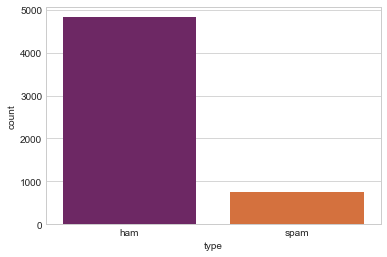

In [4]:
sns.countplot('type',data=df,palette='inferno')

In [11]:
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# 4. Prepare the data by splitting the text documents into words and also create indicator feature for frequent words


In [12]:
#Data preparation – splitting text documents into words
def text_process (x):
    return x.split()
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])
print(len(bow_transformer.vocabulary_))

15585


In [13]:
print(bow_transformer.get_feature_names()[0])
print(bow_transformer.get_feature_names()[8555])

!
february


In [14]:
#Data preparation – creating indicator features for frequent words
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4168, 15585)


# 5. Create training and test datasets

In [15]:
df['length'] = df['text'].apply(lambda x: len(x))
df = df[df['length']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 3 columns):
type      5572 non-null object
text      5572 non-null object
length    5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 174.1+ KB


In [16]:
x_train = df[:4168]['text']
y_train = df[:4168]['type']
x_test = df[4168:]['text']
y_test = df[4168:]['type']

# 6. Create indicator features for frequent words

In [17]:
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4168, 15585)


# 7. Train a model on the data

In [18]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, y_train)

# 8. Evaluate model performance

In [19]:
messages_bow = bow_transformer.transform(x_test)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1404, 15585)


In [20]:
y_pred = spam_detect_model.predict(messages_tfidf)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [21]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

confusion_matrix
[[1222    0]
 [  80  102]]


# 9. Measure performance for classifcation

In [22]:
df_table = confusion_matrix(y_test,y_pred)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.94
precision:  1.0
recall   :  0.56
F1 score :  0.72
